In [3]:
from mogestpy .quantity.Hydrological import SMAP
import pandas as pd

df = pd.read_csv(r'C:\Users\terci\OneDrive\Área de Trabalho\jag.csv')
display(df)

,dia,ETo,pr,q
0,2011-10-01,4.76,0.00,0.26
1,2011-10-02,3.07,1.16,10.80
2,2011-10-03,3.51,16.67,23.00
3,2011-10-04,4.05,0.00,6.24
4,2011-10-05,3.74,0.01,5.33
...,...,...,...,...
2917,2019-09-26,1.09,2.91,4.62
2918,2019-09-27,3.61,1.81,4.96
2919,2019-09-28,3.15,0.09,6.11
2920,2019-09-29,3.61,0.02,4.46


Calibrador

In [25]:
bacia = SMAP.SMAP.Basin(1492.52574535723, 1240.6, 0.16341751968226, 0.5, 9.54, 0.5, 30, 2.43504083550897, 2.5)
ponto = SMAP.SMAP.Point(df['pr'], df['ETo'])
modelo = SMAP.SMAP(ponto, bacia)
modelo.RunModel()

kge = spotpy.objectivefunctions.kge(df['q'], modelo.Q)

print(kge)

0.2728457409701722


In [26]:
df.filter(items=['Qcalc', 'q']).to_csv(r'C:\Users\terci\OneDrive\Área de Trabalho\result.csv')

<Axes: >

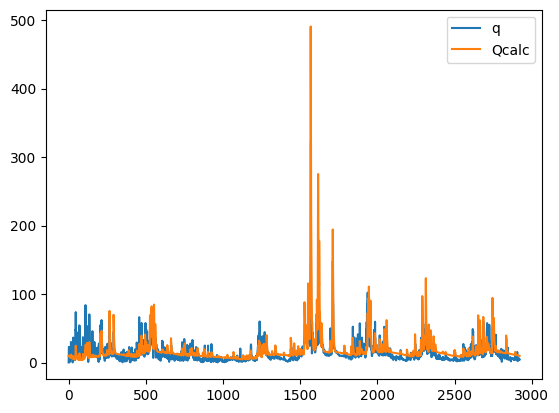

In [24]:
import matplotlib

df['Qcalc'] = modelo.Q

df.filter(items=['Qcalc', 'q']).plot()


In [29]:
import spotpy
from scipy.optimize import differential_evolution

bounds = [[100.0, 2000.0],  # Str              
              [0.0, 0.2],   # Crec
              [0.0, 1.0],   # TUin
              [0.0, 20],    # EBin
              [30, 50],     # Capc
              [30, 180],    # kkt
              [0.2, 5],     # k2t
              [2.5, 5]]     # Ai

def objective(p):
    # Sujeitos a calibração
    Str, Crec, TUin, EBin, Capc, kkt, k2t, Ai = p

    bacia = SMAP.SMAP.Basin(Str, 1240.6, Crec, TUin, EBin, Capc, kkt, k2t, Ai)
    ponto = SMAP.SMAP.Point(df['pr'], df['ETo'])
    modelo = SMAP.SMAP(ponto, bacia)
    modelo.RunModel()

    return -spotpy.objectivefunctions.kge(df['q'], modelo.Q)


result = differential_evolution(objective, bounds, maxiter=1000)

In [36]:
for i in result['x']:
    print(i)

780.1214806315793
0.10319595816401841
0.7465292927422811
20.0
46.81122288396883
180.0
5.0
2.5
